In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split #para dividir los datos
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv('salarios.csv')

In [3]:
paises = ['CO', 'MX', 'PE', 'BR', 'US'] 
dataset['Pais'] = [paises[np.random.randint(0,len(paises))] for i in range(len(dataset)) ]  # Le asigna un valor a cada pais
dataset['IDPais'] = pd.factorize(dataset['Pais'])[0]   # Le asigna al DataSet los paises
print('Dataset inicial\n\n', dataset.head())  # Muestra (con titulo) los 5 primeros valores del DataSet 

Dataset inicial

    Aexperiencia  Salario Pais  IDPais
0          10.0    42500   PE       0
1           8.0    36302   BR       1
2           5.4    35000   CO       2
3           2.5    18103   BR       1
4           1.0    15000   US       3


In [5]:
x = dataset[['Aexperiencia','IDPais']]
y = dataset['Salario']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state=0) #
regressor = LinearRegression() # Inicio del metodo "regresion Lineal"
regressor.fit(X_train, Y_train)
ajuste = regressor.score(X_test,Y_test)
print('\nEl porcentaje de ajuste es: ', ajuste*100, '%\n')


El porcentaje de ajuste es:  84.51385113156404 %



<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

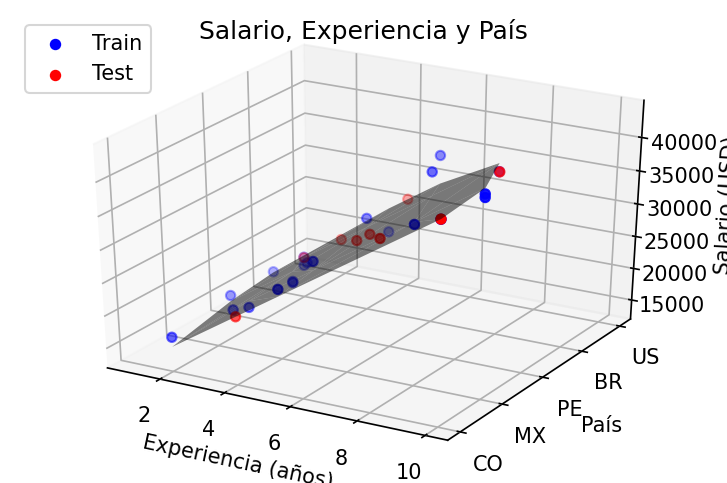

In [9]:
fig = plt.figure(dpi=150)           #Tamaño de la figura asignada
viz_train = fig.add_subplot(111, projection='3d')
# Creacion de los Scatter de entrenamiento
viz_train.scatter(X_train['Aexperiencia'], X_train['IDPais'], Y_train, color = 'blue', label = 'Train')
# Creacion de los Scatter de Prueba
viz_train.scatter(X_test['Aexperiencia'], X_test['IDPais'], regressor.predict(X_test), color = 'red', label = 'Test')
# La creacion del plano predictivo, como es un modelo 3D, no sirve una extencion lineal.
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['IDPais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
# Titulo y Labels
viz_train.set_title('Salario, Experiencia y País')
viz_train.set_xlabel('Experiencia (años)')
viz_train.set_ylabel('País')
viz_train.set_zlabel('Salario (USD)')
viz_train.set_yticks(range(len(paises)))
viz_train.set_yticklabels(paises)
plt.legend(loc="upper left") 
fig.show

## Respuesta numero 2

In [10]:
import plotly.express as px
# Gráfica de los datos de entrenamiento.
fig = px.scatter_3d(x=X_train['Aexperiencia'].values, y=X_train['pais'].values, z=Y_train,
                 color = X_train['Aexperiencia'],
                 width = 600, height = 600,
                 labels = {'x': 'Experiencia', 'y': 'Pais', 'z': 'Salario'},
                 title='Relación Salario-Experiencia-Pais')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [11]:
# Gráfica de los datos de prueba.
fig = px.scatter_3d(x=X_test['Aexperiencia'].values, y=X_test['pais'].values, z=Y_test,
                 color = X_test['Aexperiencia'],
                 width = 600, height = 600,
                 labels = {'x': 'Experiencia', 'y': 'Pais', 'z': 'Salario'},
                 title="Relación Salario-Experiencia-Pais",)
fig.show()

NameError: name 'px' is not defined

## Respuesta 3

In [15]:
# defino los paises en list paises
paises = ['CO','BR','PE','MX']

# llevo cada elemento de paises a que sea convertido a un numero
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

# de forma aleatoria creo 30 elementos para dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

# paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset

In [16]:
# Dividiendo las columnas en x y y
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Evaluamos performance
print(regressor.score(X_test, Y_test))

ValueError: could not convert string to float: 'PE'

KeyError: 'pais'

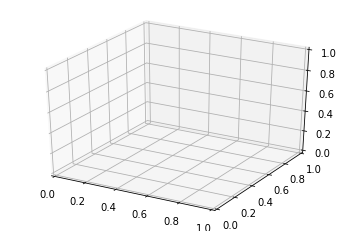

In [13]:
# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, se entreno como se debe
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

In [ ]:
# probamos con datos de test
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show